# Ejercicios Entrega 1

## Ejercicio 1
### Calibra tu cámara mediante múltiples imágenes de un *chessboard* siguiendo las instrucciones del README en `code/calibrate`. Usa el modo standard o por defecto de la cámara y toma nota de su resolución ($W\times H$).

Para ello, realicé las imágenes que se pueden encontrar en la carpeta `code/calibrate/mylogitech`, las cuales hice con la webcam. Tras ello, ejecuté el programa `./calibrate.py` y como resultado obtuve la siguiente salida:

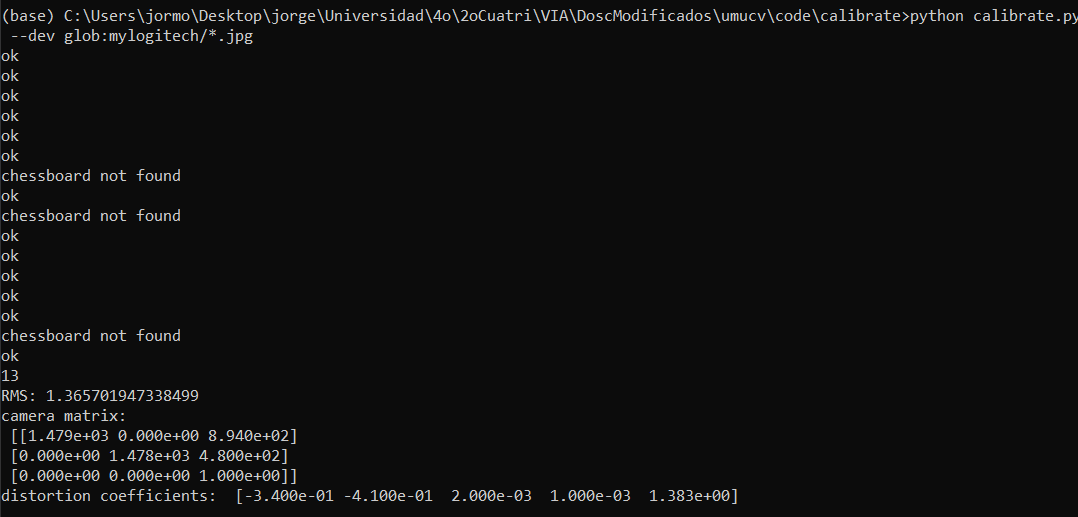

donde se ve el $RMS$ obtenido, la matriz de calibración $K$, y los coeficientes de distorsion de la cámara.

Además, como se puede comprobar en las imágenes de dicha carpeta, la resolución de la cámara es de ($1920\times 1080$) px

También podemos comprobar a raíz de la matriz $K$, que el parámetro $f$, que aparece en la primera celda de dicha matriz, toma el valor de $f=1.479 \times 10^3$

## Ejercicio 2
### Con el parámetro $f$ obtenido en la calibración, determina el campo visual (FOV, $field of view$) horizontal y vertical.

Para calcular el FOV vertical y horizontal, apliqué la siguiente fórmula:

$$\displaystyle \tan\left(\frac{FOV}{2}\right) = \frac{\frac{w}{2}}{f}$$

Y despejando el FOV en ella, obtenemos:

$$FOV_h = 2\times \arctan(\frac{w}{2f}) = 2\times \arctan(\frac{1920}{2\times 1479})=65.9742º$$

$$FOV_v = 2\times \arctan(\frac{h}{2f}) = 2\times \arctan(\frac{1080}{2\times 1479})=40.1154º$$


## Ejercicio 3
### Comprueba que estos datos son consistentes con el tamaño de la imagen que obtienes con un objeto de tamaño conocido y situado a una distancia conocida.

Ejecutando el programa `./mouse.py` y usando una imagen que fue tomada a $20cm$ de la cámara, a un ratón inalambrico de $9cm$ la cual se puede encontrar en la carpeta `code/calibrate/mylogitech`, obtenemos que ese ratón mide $635$ píxeles en la pantalla, como lo muestra la siguiente imagen:

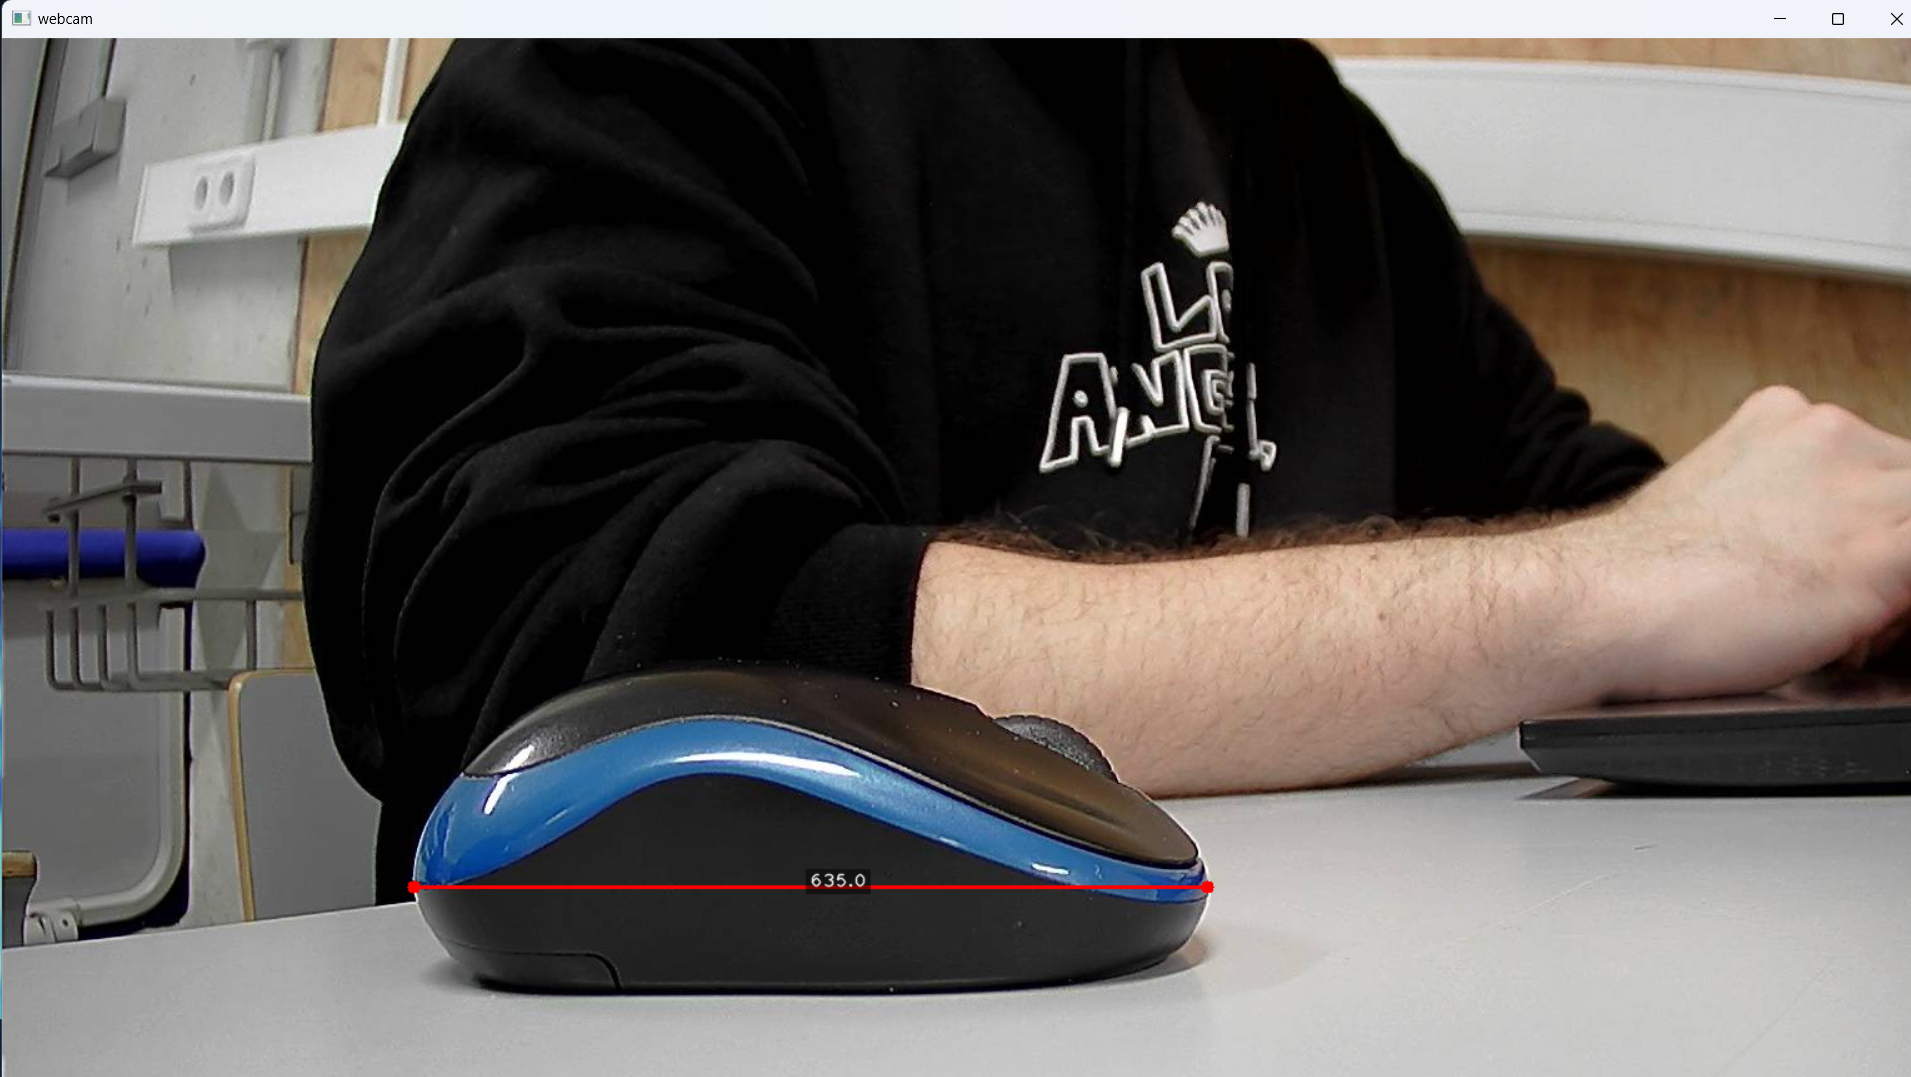

Además, usando la siguiente fórmula, calculo teóricamente el tamaño en píxeles del ratón

$$u=\frac {f\times X}{Z}$$

Obtenemos el siguiente resultado:

$$u=\frac {1479\times 9}{20}=665 px$$

Como se puede comprobar, el cálculo teórico y el valor real son prácticamente idénticos, solo difieren en $30 px$

## Ejercicio 4
### Calcula aproximadamente: 
#### a) el tamaño en pixels que tendrá una persona situada a 10m de la cámara.

Siguiendo con la fórmula del ejercicio anterior:

$$u=\frac {f\times X}{Z}$$

Tomando como referencia que una persona promedio mide de ancho unos $50cm$ obtenemos

$$u=\frac {1479\times 0.5}{10}=73.95 px$$

#### b) A qúe distancia se encuntra un coche que en la imagen tiene $20px$ del acho.

Del mismo modo y asumiendo que un coche promedio mide de ancho unos $1.8m$ obtenemos

$$20px =\frac {1479\times 1.8}{Z}$$

$$Z=\frac {1479\times 1.8}{20}=133m$$


## Ejercicio 5
### Determina a qué altura hay que poner la cámara para obtener una vista cenital completa de un campo de baloncesto.

Continuando con la fórmula:

$$u=\frac {f\times X}{Z}$$

Como para que se consiga ver el campo completo se tienen que ver tanto todo el ancho como todo el alto del mismo, asumo que para que se vea al completo, como mínimo, debería de ocupar todo el ancho de la pantalla, es decir, $1920px$, y el ancho de un campo de baloncesto es de $28m$

$$1920px =\frac {1479\times 28}{Z}$$

$$Z=\frac {1479\times 28}{1920}=21.57m$$

## Ejercicio 6
### Calcula el tamaño en pixels de la pelota cuando está en el suelo.

Teniendo en cuenta que una pelota de baloncesto tiene un diámetro de $22cm$ y hemos calculado que la altura de la cámara es de 21.57, obtenemos que el tamaño es:

$$u =\frac {1479\times 0.22}{21.57}=15.08px$$

## Ejercicio 7
### Escribe una función que devuelva la altura de la pelota sobre el suelo a partir de su diámetro aparente en pixels.

Dicha funcion se obtiene a raíz de despejar la Z en la fórmula anterior

$$u=\frac {f\times X}{Z}$$

De la cual se consigue, sabiendo su diámetro en centímetros, la siguiente función:

$$\text{f(diam)}=\frac {f\times 0.22} {\text{diam}}=Z$$

Sin embargo, esto devolvería la altura con respecto a la cámara, por tanto, habría que modificarla, sabiendo la altura de la cámara, para que de la altura respecto al suelo:

$$\text{f(diam)}= 21.57 - \frac {f\times 0.22} {\text{diam}}=Z$$

## Ejercicio 8
### Haz una aplicación para medir el ángulo que definen dos puntos marcados con el ratón en la imagen.

Para este ejercicio realicé un programa para hacer el cálculo aproximado del ángulo, y otro para hacer el cálculo preciso.

En primer lugar, este es el código del programa con el cálculo aproximado:

In [ ]:
#!/usr/bin/env python

import cv2 as cv
from umucv.stream import autoStream
from collections import deque #lista doblemente enlazada, es decir, se puede acceder a los elementos de la lista desde el principio y el final
from umucv.util import putText
import numpy as np

puntos = deque(maxlen=2) #maxlen=2 para que solo se guarden los ultimos 2 puntos

def manejador(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x,y)
        puntos.append([x,y])

cv.namedWindow("webcam")
cv.setMouseCallback("webcam", manejador)


for key, frame in autoStream():
    for p in puntos:
        cv.circle(frame, p, 5, (0,0,255), thickness=-1) # (frame, tupla de puntos, radio, color, grosor)
    if len(puntos)==2:
        cv.line(frame, puntos[0], puntos[1], (0,0,255), 2) # (frame, punto1, punto2, color, grosor)
        pm = np.mean(puntos, axis=0).astype(int) #para tener el par de coordenadas en la variable pm (punto medio)
        d=np.linalg.norm(np.array(puntos[0])-puntos[1]) #distancia entre los dos puntos
        
        fov=65.97
        grados=fov*d/1920
        
        msg=f"{grados} grados"
        putText(frame, msg, pm)

    cv.imshow('webcam',frame)

cv.destroyAllWindows()



Y a continuación, el código del programa con el cálculo preciso:

In [2]:
#!/usr/bin/env python

import cv2 as cv
from umucv.stream import autoStream
from collections import deque #lista doblemente enlazada, es decir, se puede acceder a los elementos de la lista desde el principio y el final
from umucv.util import putText
import numpy as np

puntos = deque(maxlen=2) #maxlen=2 para que solo se guarden los ultimos 2 puntos
f=1479 #focal length
K=np.array([[f,0,894],[0,1478,480],[0,0,1]]) #matriz de dispersión 

def manejador(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x,y)
        puntos.append([x,y])

cv.namedWindow("webcam")
cv.setMouseCallback("webcam", manejador)


for key, frame in autoStream():
    for p in puntos:
        cv.circle(frame, p, 5, (0,0,255), thickness=-1) # (frame, tupla de puntos, radio, color, grosor)
    if len(puntos)==2:
        cv.line(frame, puntos[0], puntos[1], (0,0,255), 2) # (frame, punto1, punto2, color, grosor)
        pm = np.mean(puntos, axis=0).astype(int) #para tener el par de coordenadas en la variable pm (punto medio)
        d=np.linalg.norm(np.array(puntos[0])-puntos[1]) #distancia entre los dos puntos
        
        vectorP1=np.linalg.inv(K) @ np.array([puntos[0][0],puntos[0][1],1])
        vectorP2=np.linalg.inv(K) @ np.array([puntos[1][0],puntos[1][1],1])
        
        #calculo del angulo entre los dos vectores
        coseno=(vectorP1@vectorP2)/(np.linalg.norm(vectorP1)*np.linalg.norm(vectorP2))
        grados=np.arccos(coseno)*180/np.pi

        msg=f"{grados} grados"
        putText(frame, msg, pm)

    cv.imshow('webcam',frame)

cv.destroyAllWindows()



640x360 30.0fps


Como se puede observar, ambos programas son una modificación del fichero `./mouse.py`.

Sin embargo, en el primer programa, utilizo el $FOV$ calculado anteriormente, del cual sabemos que su valor es $65.97$, además de la distancia ente los 2 puntos seleccionados, medida en píxeles y el ancho en píxeles de la pantalla que es $1920px$.

Para ello utilizo la fórmula:

$$\theta= \frac {FOV\times d}{1920}$$

donde $\theta$ es el ángulo a calcular.

En el segundo programa, en cambio, utilizo la matriz de calibracion $K$ junto con los dos puntos $P=(p,q)$ y $Q=(p',q')$.

En primer lugar calculo los vectores generados por ambos puntos aplicando la fórmula:

\begin{split}\begin{bmatrix}X \\ Y \\ Z\end{bmatrix} = K^{-1}\begin{bmatrix} p \\  q \\ 1\end{bmatrix}\end{split}

Tras ello, aplico la formula:

$$\cos(\theta)=\frac {A\times B} {|A|·|B|}$$

de la cual, despejando $\theta$ obtenemos que el ángulo se calcula de la siguiente forma:

$$\theta=\arccos (\frac {A\times B} {|A|·|B|})$$